<a href="https://colab.research.google.com/github/avionerman/machine_learning_2025/blob/main/Exercise_8_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!unzip -q dog_breed_image_dataset.zip

# Step 3: Load images properly

In [43]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

image_size = 64

breeds = sorted(os.listdir('dataset'))
num_classes = len(breeds)
print(f"Number of breeds: {num_classes}")

images = []
labels = []

# loop each breed dir
for label_id, breed in enumerate(breeds):
    breed_folder = os.path.join('dataset', breed)
    for image_name in os.listdir(breed_folder):
        image_path = os.path.join(breed_folder, image_name)
        try:
          img = Image.open(image_path).convert('RGB')
          img = img.resize((image_size, image_size)) # resize to 64x64
          images.append(np.array(img))
          labels.append(label_id) #save numerci label
        except:
          pass

# normalization
x = np.array(images) / 255.0

# converting numeric to one-hot vectors, i.e. if it's 1 will be [0, 1, 0, 0, ... 0]
y = to_categorical(np.array(labels), num_classes)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

Number of breeds: 10
x_train: (676, 64, 64, 3), x_test: (291, 64, 64, 3)
y_train: (676, 10), y_test: (291, 10)


# Step 4: Build MLP

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

mlp_model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

mlp_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1024)           │    12,583,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,274,250 (50.64 MB)

 Trainable params: 13,274,250 (50.64 MB)

 Non-trainable params: 0 (0.00 B)

# Step 5: Adam Optimizer + parameters

In [45]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

history = mlp_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=30
)

# calculating f1 for each epoch

precision = history.history['precision']
recall = history.history['recall']

f1 = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision, recall)]

for epoch, score in enumerate(f1, 1):
    print(f"Epoch {epoch} has -> F1 = {score:.4f}")

val_precision = history.history['val_precision']
val_recall = history.history['val_recall']

val_f1 = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(val_precision, val_recall)]

print("Final Training F1:", f1[-1])
print("Final Validation F1:", val_f1[-1])

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.1207 - loss: 5.2677 - precision: 0.1116 - recall: 0.0614 - val_accuracy: 0.1100 - val_loss: 3.5744 - val_precision: 0.1194 - val_recall: 0.0825
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1365 - loss: 2.8198 - precision: 0.1860 - recall: 0.0321 - val_accuracy: 0.1100 - val_loss: 2.6423 - val_precision: 0.1538 - val_recall: 0.0206
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2451 - loss: 2.2273 - precision: 0.1213 - recall: 0.0014 - val_accuracy: 0.3127 - val_loss: 1.9563 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2677 - loss: 2.0180 - precision: 0.5763 - recall: 0.0246 - val_accuracy: 0.2680 - val_loss: 2.0483 - val_precision: 0.3725 - val_recall: 0.0653
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3472 - loss: 1.9479 - precision: 0.4717 - recall: 0.0415 - val_accuracy: 0.3162 - val_loss: 1.9

# Step 6: MLP Results Visualization

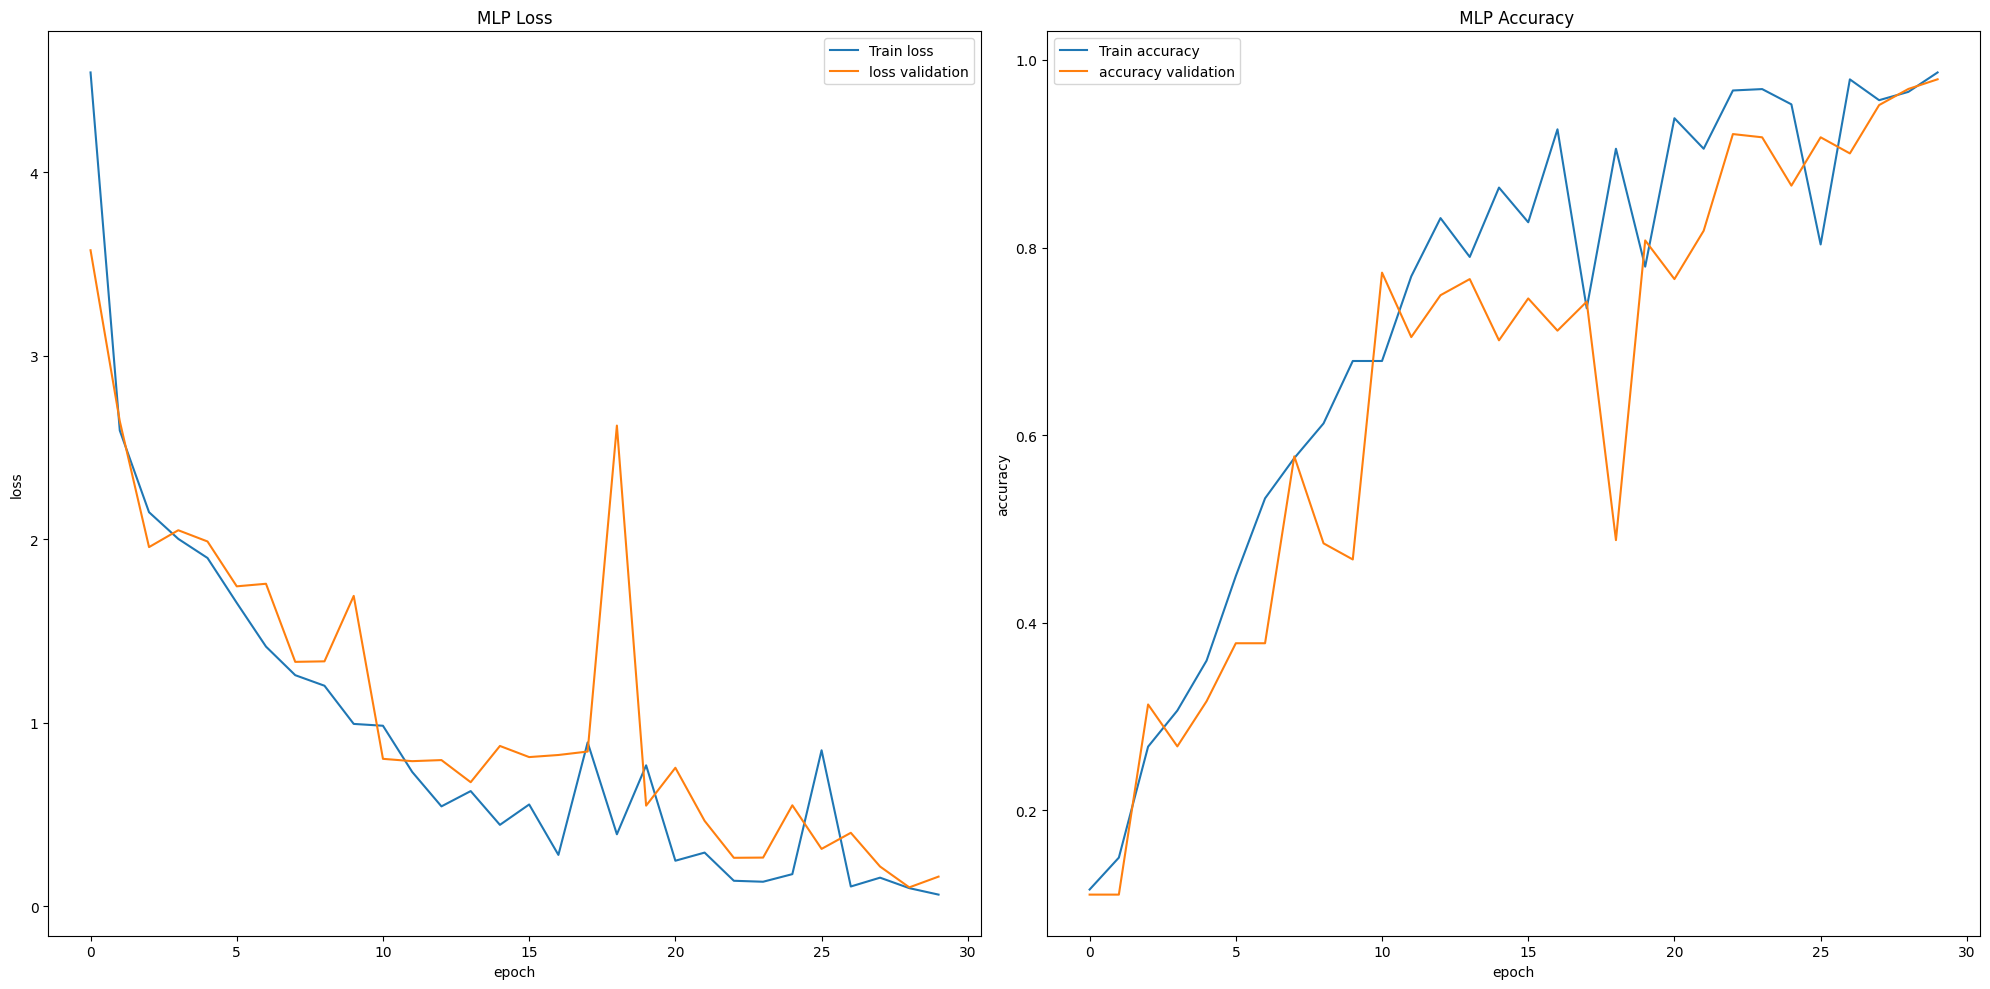

In [46]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# loss decreament over epochs
axes[0].plot(history.history['loss'], label='Train loss')
axes[0].plot(history.history['val_loss'], label='loss validation')
axes[0].set_title('MLP Loss')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[0].legend()

# accuracy increament over epochs
axes[1].plot(history.history['accuracy'], label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], label='accuracy validation')
axes[1].set_title(' MLP Accuracy')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

# Step 7a: Build + Compile + Metrics on CNN

In [47]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

"""
  * Conv2D: slides small filters across the image to detect patterns (edges, shapes, textures)
  * kernel size: the size of the filter, if it's 3, then the filter will be 3x3 - 9 pixels at a time
    small size detects fine details, big size detects bigger patterns
  * strides: defines how many pixels the filter jumpbs when sliding
     if 2, x_x_
  * MaxPooling2D: shrinks the image by keeping onl the strongest value in each small area
     if 1, 2, 3, 4 -> keeps max, so 4
  * Dropout: randomly turns off neurons during training to prevent overfitting.
     if 0.2 -> turning off 20% of the neurons randomly for each batch
  * Flatten: Converts 2D feature maps into a 1D vector
     highly needed, since Dense work with 1D
  * Dense: receive inputs, multiplies ech by a weight, applies activation and output one number
  * activation: adds non-linearity so the NN can learn complex patterns
     relu    -> for hidden layers (exluding negatives)
     softmax -> for output layer (converts to probs so to sum up to 1)
  * input_shape: define to the NN what's the size of the input images
     added only on the top layer since it's the initial one, the rest follow that predefined ruleset
"""
cnn_model = Sequential([

    # num filters: 32
    # kernel size: (3, 3) - 9 pixels at a time
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),

    # post Conv2D result:
    # 32 filters for each 3x3 slide across the image, will give a feature map of (62 x 62)
    # loosing 1 pixel while sliding the image due to the 3x3 filter
    # and applying relu the result will be (62, 62, 32)

    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn_model.summary()

# kept the MaxPooling2D instead of the strides,
# cause I wanted to keep the max, and not randomly jumping the pixels.
# not adding multiple dense layers cause I want to not risk overfitting my model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,275,722 (4.87 MB)

 Trainable params: 1,275,722 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

cnn_history = cnn_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=30
)

# calculating f1 for each epoch

precision = cnn_history.history['precision']
recall = cnn_history.history['recall']

f1 = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision, recall)]

for epoch, score in enumerate(f1, 1):
    print(f"Epoch {epoch} has -> F1 = {score:.4f}")

val_precision = cnn_history.history['val_precision']
val_recall = cnn_history.history['val_recall']

val_f1 = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(val_precision, val_recall)]

print("Final Training F1:", f1[-1])
print("Final Validation F1:", val_f1[-1])

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.1243 - loss: 2.3102 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1787 - val_loss: 2.2030 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2812 - loss: 2.0388 - precision: 0.4958 - recall: 0.0095 - val_accuracy: 0.4433 - val_loss: 1.5977 - val_precision: 0.7660 - val_recall: 0.1237
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5388 - loss: 1.3622 - precision: 0.7814 - recall: 0.2258 - val_accuracy: 0.6117 - val_loss: 1.1703 - val_precision: 0.8542 - val_recall: 0.4227
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6626 - loss: 0.9787 - precision: 0.8577 - recall: 0.4825 - val_accuracy: 0.7732 - val_loss: 0.8098 - val_precision: 0.9167 - val_recall: 0.6048
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8891 - loss: 0.4543 - precision: 0.9349 - recall: 0.7667 - val_accuracy: 0.9347 - 

# Step 7b: CNN Results Visualization

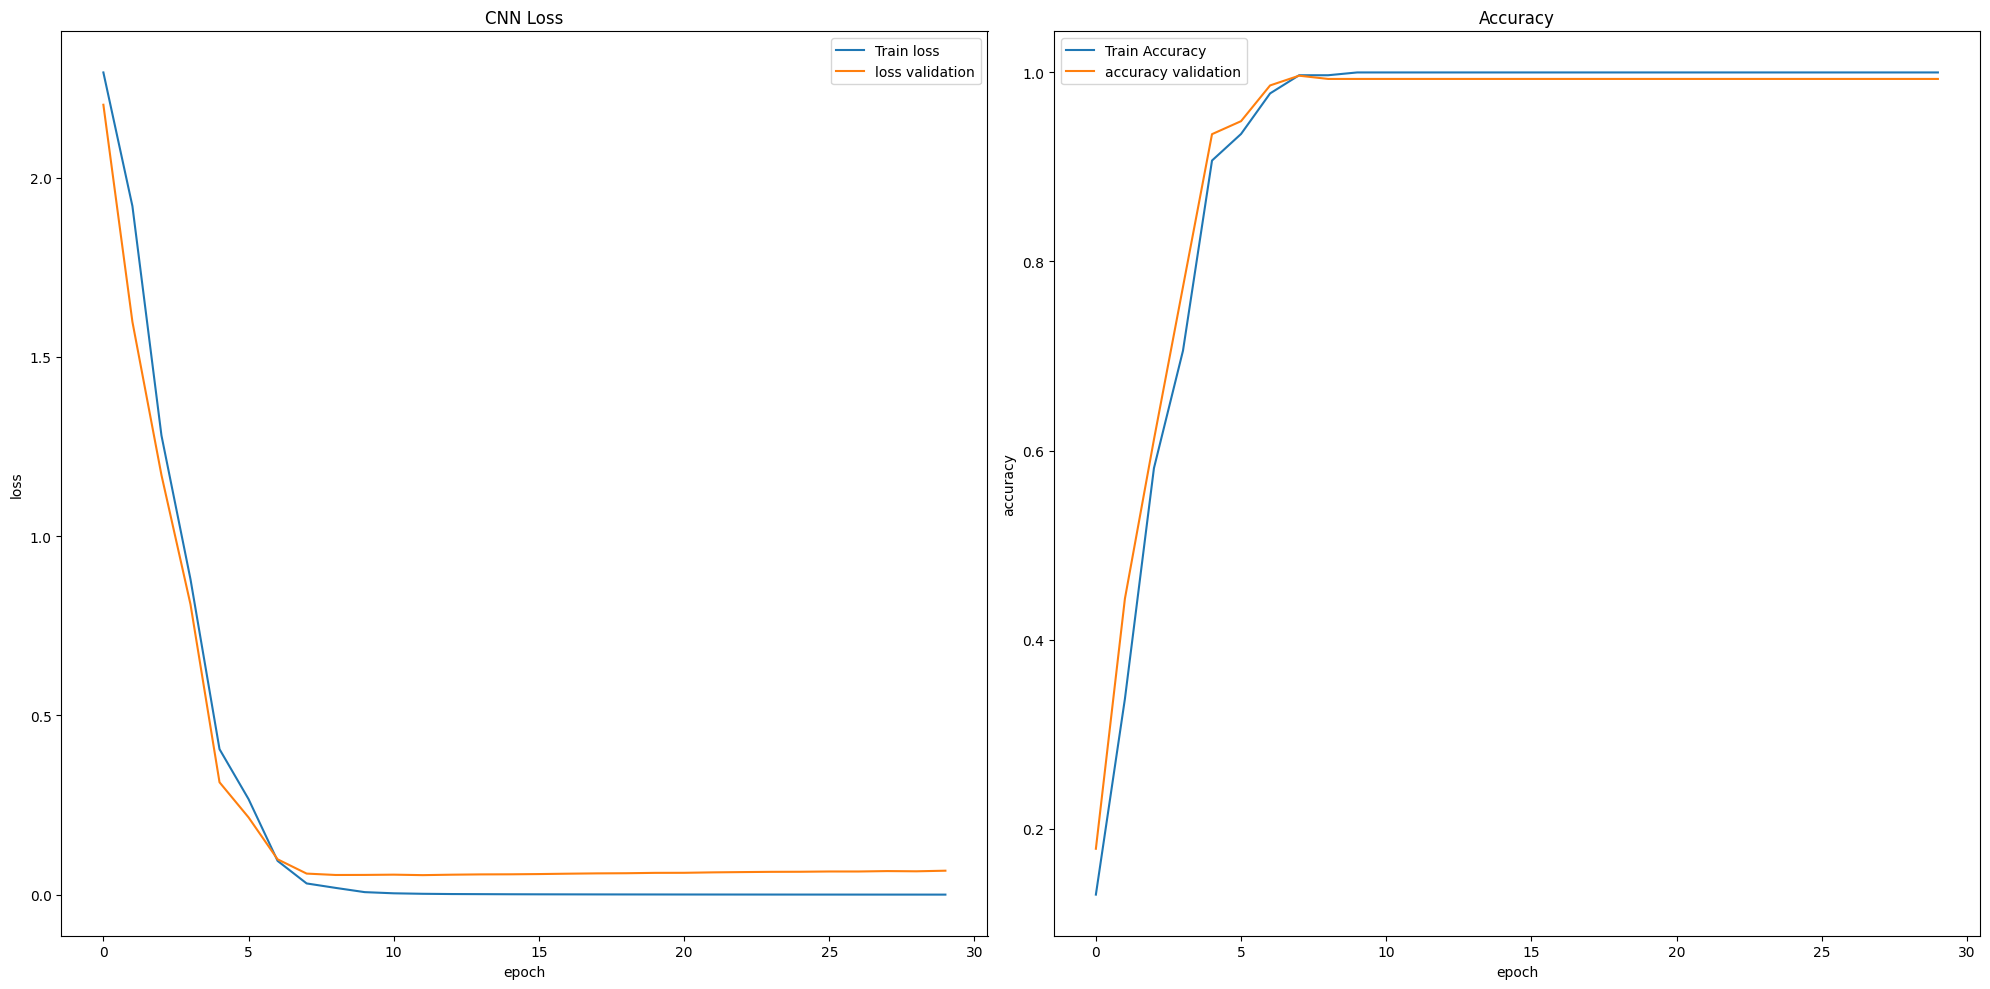

In [49]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# loss decreament over epochs
axes[0].plot(cnn_history.history['loss'], label='Train loss')
axes[0].plot(cnn_history.history['val_loss'], label='loss validation')
axes[0].set_title('CNN Loss')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[0].legend()

# accuracy increament over epochs
axes[1].plot(cnn_history.history['accuracy'], label='Train Accuracy')
axes[1].plot(cnn_history.history['val_accuracy'], label='accuracy validation')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

# Models Comparison

| Metric | MLP | CNN |
|---|---|---|
| Final Training Accuracy | ~1.00 | ~1.00 |
| Final Validation Accuracy | ~0.92 | ~0.98 |

<br>

Using the data above I can observe about **MLP**, that there is a big gap between its training accuracy (1.0) and its validation accuracy (almost 0.9), since MLP memorized the training data and couldn't recognize easily new dogs.

When it comes to **CNN**, I can say that generalize better, since both training and validation stay almost together. I dare to say that CNN actually learned the difference of patterns among the dog breeds.

<br>

***WHY?:***

<br>

[1] One of the reasons, is the huge parameters difference between these two. MLP has more than 6 million, while CNN has less than 1.5 million (75% difference). The more the parameters, the bigger the change to memorize, thus to overfit.

[**many params** -> **easy to memorize** -> **easier to overfit**]

<br>

[2] Another important reaon, I think, it's the way that these two methods share the weights. For MLP, we have 6 million parameters, thus 6 million weights. While for CNN, the GxG filter (Y weight) it can be similar across the entire image. That way if a pattern is too specific and is not part of the normal patterns. That said, the more the unique weights the easier to memorize, so generalization is not going to be good because it memorizes and not learning.

[**fewer unq. weights** -> **difficult to memorize** -> **easier to generalize**]

<br>

Summary:

Both ways are working fine, though CNN slightly better and obviously due to the aforementioned there are some valid reasons about that.

# Step 8: Improve CNN result

I normalized the data in **Step 3**, and the result is **0.995**. That's almost perfect, I don't think that anything else is needed, that said I won't add under the pre-processing step anything else.